In [1]:
#from cscope_analysis.crop import cScopeCropGUI
import cv2
from pathlib import Path
import skvideo.io

import pandas as pd
import scipy
import caiman as cm
import numpy as np
import matplotlib.pyplot as plt
import h5py
from cscope_analysis import cScopeRecording
from cscope_analysis.movie import get_movie_info, movie_to_h5

from tqdm.auto import tqdm

In [2]:
ddir = 'C:/Users/roaffan/cscope_gk/2021_12_16/12_10_56'
beh_ts_file = 'C:/Users/roaffan/cscope_gk/2021_12_16/12_10_56/BehaviorCam/timeStamps.csv'

In [3]:
# behavior cam video files (sorted)
mini_videos = list((Path(ddir) / "BehaviorCam").glob("*.avi"))
mini_inds = np.array([int(mv.stem) for mv in mini_videos])
behcam_videos = [mini_videos[i] for i in mini_inds.argsort()]
behcam_video_file = Path('C:/Users/roaffan/cscope_gk/2021_12_16/12_10_56/cscope-analysis/behcam.mp4')

behcam_ts = pd.read_csv(beh_ts_file)
behcam_ts.columns = pd.Index(["frame", "ts", "buffer_idx"])

In [14]:
fps = 30
downsample = 4
crf=0
progress = True

width, height, _, _ = get_movie_info(behcam_videos[0])
crop = (0, width, 0, height)

xmin, xmax, ymin, ymax = crop
im_size = (xmax - xmin + 1, ymax - ymin + 1)
im_size_ds = (int(im_size[0] / downsample), int(im_size[1] / downsample))


In [15]:

### loop through videos and write frames

behcam_writer = skvideo.io.FFmpegWriter(
    behcam_video_file.as_posix(),
    inputdict={"-r": f"{int(fps/2)}"},
    outputdict={
        "-vcodec": "libx264",
        "-crf": f"{crf}",
        "-preset": "veryslow",
        "-r": f"{int(fps)/2}",
    },
)

frame_ind = 0

it = (
    tqdm(range(len(behcam_videos)))
    if progress
    else range(len(behcam_videos))
)

### ###
for i in it:

    cap = cv2.VideoCapture(behcam_videos[i].as_posix())
    ret = True

    it2 = (
        tqdm(range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))), leave=False)
        if progress
        else range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
    )

    for j in it2:

        ret, frame = cap.read()

        if ret:

            frame = frame[ymin:ymax, xmin:xmax]
            frame = cv2.resize(frame, dsize=im_size_ds)
            frame = cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE)

            behcam_writer.writeFrame(frame)

            frame_ind += 1

        else:

            print(f"NO FRAME = {i}, {j}, {frame_ind}")

behcam_writer.close()

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1508 [00:00<?, ?it/s]

In [6]:
behcamf = cm.load(ddir+'/cscope-analysis/behcam.mp4')
### plot to check hemodynamic corrected df/f frames
print(np.shape(behcamf))


(15441, 160, 120)


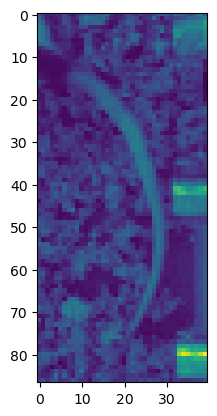

In [8]:
plt.imshow(behcamf[4,28:115,80:])
plt.show()

In [5]:
dum=np.rollaxis(behcamf,0,3)
new_dat = dum[:,:,(behcam_ts["ts"]>=208) & (behcam_ts["ts"]<=6283123)]
print(np.shape(new_dat))

NameError: name 'behcam_ts' is not defined

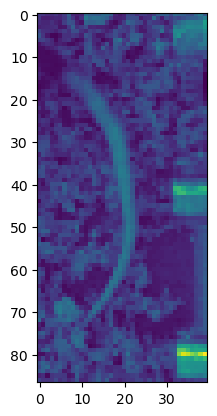

In [27]:
plt.imshow(new_dat[28:115,80:,4])
plt.show()

In [28]:
### save as mat file
savedir=ddir+'/cscope-analysis/'
# savefile=savedir+'dff_hemo_alpha.mat'
savefile=savedir+'behcam.mat'
savedata = new_dat[28:115,80:,:]
scipy.io.savemat(savefile, {'behcam':savedata})

In [29]:
new_behcam_file = 'C:/Users/roaffan/cscope_gk/2021_12_16/12_10_56/cscope-analysis/behcam_ts.csv'
new_behcam_ts = behcam_ts[(behcam_ts["ts"]>=208) & (behcam_ts["ts"]<=6283123)]
new_behcam_ts.to_csv(new_behcam_file, sep=',')

In [ ]:
#vid = cScopeRecording(mini_dir='C:/Users/sujin/cscope_gk/2021_12_14/13_18_58', cscope_dir=None)
#ddir = 'C:/Users/sujin/cscope_gk/2021_12_14/13_18_58'
ddir = 'C:/Users/roaffan/cscope_gk/2021_12_16/12_10_56'
vid  = cScopeRecording(mini_dir=ddir, cscope_dir=None)

In [ ]:
# movie_file=ddir+'/cscope-analysis/green_mc.mp4'
# gm = cm.load(movie_file)
# # gm[np.where(gm<1)] = np.min(gm[gm>0])
# gm[np.where(gm<1)] = np.mean(gm[gm>0])
# plt.imshow(gm[5,:,:])
# plt.show()
# plt.imshow(gm[30000,:,:])
# plt.show()
# print(np.shape(gm))
# print("values of edge pixels in frame 30000:", gm[30000,0:1,0:46] )
# # plt.imshow(gm[90000,:,:])
# # plt.show()

# # check data after split
# movie_file=ddir+'/cscope-analysis/green.mp4'
# cap = cv2.VideoCapture(movie_file)
# ret, frame = cap.read()    
# print(np.shape(frame))
# plt.imshow(frame[:,:,2]) 
# plt.show()

# # check data after split
# movie_file=ddir+'/cscope-analysis/green_mc.mp4'
# cap = cv2.VideoCapture(movie_file)
# ret, frame = cap.read()    
# print(np.shape(frame))
# plt.imshow(frame[:,:,2]) 
# plt.show()

# # green = h5py.File(open(ddir+'/cscope-analysis/green_mc.h5', "rb"), mode="r")
# # for i in np.arange(0,100):
# #     print( "\n", np.count_nonzero(green["data"][:,:,i]==0) )
# # green.close()

In [ ]:
#  vid.correct_timestamps(save=True, plot=False, overwrite=True)
# vid.split_videos(downsample=8,fps=30,crf=0,crop=None,overwrite=True,progress=True)
# vid.interpolate_green(overwrite=True)
# vid.motion_correction(use_blue=True, parallel=True, processes=None, splits=14, overwrite=True)

vid.hemodynamic_correction(
#         max_alpha=9000,
        max_alpha=0,
        splits=0,
        n_processes=1,
        use_mc=True,
        progress=False,
        overwrite_hc=True,
        overwrite_h5=True,
        save_hc=True,
        save_h5=True
    )

In [ ]:
### check motion correction h5 file
filename = ddir+'/cscope-analysis/blue.h5'
hf = h5py.File(filename, 'r')
hf.keys()
print(np.shape(np.array(hf.get('data'))))
print(np.mean(np.array(hf.get('data')),))
print(np.max(np.array(hf.get('data'))))
print(np.min(np.array(hf.get('data'))))

hf.close()


In [ ]:
# vid.motion_correction(use_blue=True, parallel=True, processes=None, splits=14, overwrite=True)

In [ ]:
# # ### check motion correction h5 file
# # filename = ddir+'/cscope-analysis/blue_mc.h5'
# # hf = h5py.File(filename, 'r')
# # hf.keys()
# # print(np.shape(np.array(hf.get('data'))))
# # print(np.mean(np.array(hf.get('data')),))
# # print(np.max(np.array(hf.get('data'))))
# # print(np.min(np.array(hf.get('data'))))
# # blue_mc = np.array(hf.get('data'))
# # hf.close()

# blue_mc = cm.load(ddir+'/cscope-analysis/blue.mp4')
# ### plot to check hemodynamic corrected df/f frames
# print(np.shape(blue_mc))

# plt.imshow(blue_mc[500,:,:])
# plt.show()

# plt.imshow(blue_mc[5000,:,:])
# plt.show()

# plt.imshow(blue_mc[50000,:,:])
# plt.show()

# # plt.imshow(blue_mc[:,:,500])
# # plt.show()

# # plt.imshow(blue_mc[:,:,5000])
# # plt.show()

# # plt.imshow(blue_mc[:,:,50000])
# # plt.show()

# plt.imshow(blue_mc[50000,92:,44:])
# print(blue_mc[50000,92:,44:])

### check motion correction h5 file
filename = ddir+'/cscope-analysis/blue.h5'
hf = h5py.File(filename, 'r')
hf.keys()
print(np.shape(np.array(hf.get('data'))))
print(np.mean(np.array(hf.get('data')),))
print(np.max(np.array(hf.get('data'))))
print(np.min(np.array(hf.get('data'))))
blue = np.array(hf.get('data'))
hf.close()

### save as mat file
savedir=ddir+'/cscope-analysis/'
# savefile=savedir+'dff_hemo_alpha.mat'
savefile=savedir+'blue.mat'
scipy.io.savemat(savefile, {'blue':blue})

In [ ]:
# plt.imshow(blue_mc[92:,44:,50000])
# print(blue_mc[92:,44:,50000])

In [ ]:
### save as mat file
savedir=ddir+'/cscope-analysis/'
# savefile=savedir+'dff_hemo_alpha.mat'
savefile=savedir+'dff_hemo.mat'
scipy.io.savemat(savefile, {'dff':dff})